In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
from analysis.plot_matplotlib import plot_hist

In [2]:
src_file = "./results/lambda_sigma_cross_sec.txt"

In [3]:
[float(x) for x in re.findall("\d.\d+e\D\d+", "Cross-section :   8.502e-03 +- 1.464e-05 pb")]

[0.008502, 1.464e-05]

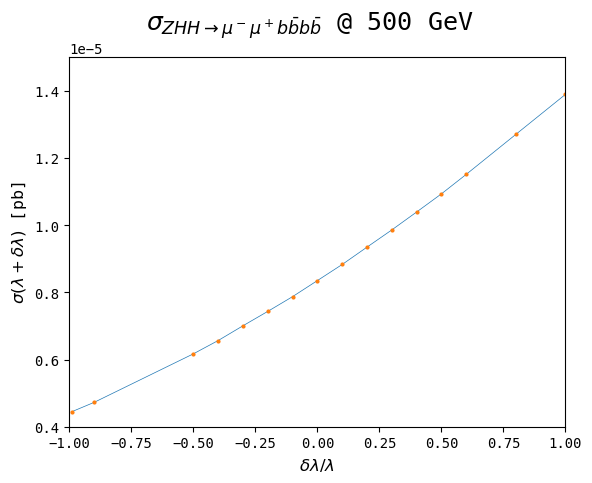

In [7]:
results = []

file = open(src_file)
start_flag = False
LAM_MULT = None
for line in file:
    if "START" in line:
        start_flag = True
    
    if start_flag:
        if "===" in line:
            LAM_MULT = float(re.findall("\d+_\d+", line)[0].replace("_", "."))
            
        if "Cross-section :" in line:
            if LAM_MULT is None:
                raise Exception("Unexpected")
            
            sigma, dsigma = [float(x) for x in re.findall("\d.\d+e\D\d+", line)]
            results.append([LAM_MULT, sigma, dsigma])
            
            LAM_MULT = None

results.sort(key=lambda x:x[0])
results = np.array(results).T
results[0] = results[0] - 1

fig, ax = plt.subplots()

plt.plot(results[0], results[1], linewidth=0.5)
ax.errorbar(results[0], results[1], yerr=results[2], fmt='o', ms=2)
ax.set(xlim=(-1, 1), ylim=(4e-6, 1.5e-5), yscale="linear", xlabel=r"$\delta\lambda/\lambda$", ylabel=r"$\sigma(\lambda+\delta\lambda)$ [pb]")

fig.suptitle(r"$\sigma_{ZHH\rightarrow\mu^- \mu^+ b\bar{b} b\bar{b}}$ @ 500 GeV", fontsize=18)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

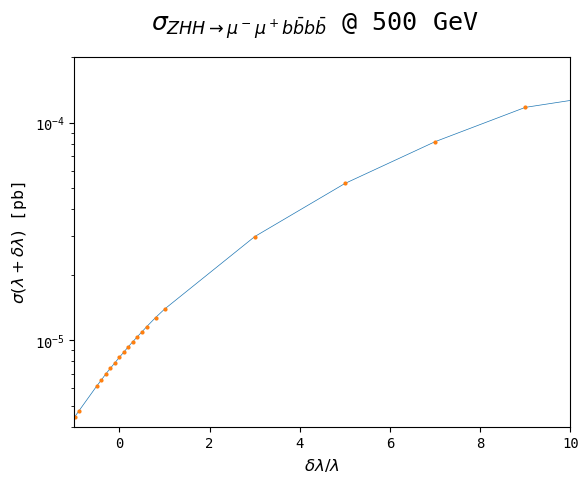

In [8]:
fig, ax = plt.subplots()

plt.plot(results[0], results[1], linewidth=0.5)

ax.errorbar(results[0], results[1], yerr=results[2], fmt='o', ms=2)
ax.set(xlim=(-1, 10), ylim=(4e-6, 2e-4), yscale="log", xlabel=r"$\delta\lambda/\lambda$", ylabel=r"$\sigma(\lambda+\delta\lambda)$ [pb]")

fig.suptitle(r"$\sigma_{ZHH\rightarrow\mu^- \mu^+ b\bar{b} b\bar{b}}$ @ 500 GeV", fontsize=18)
ax.xaxis.label.set_size(12)
ax.yaxis.label.set_size(12)

In [37]:
import numpy as np

Given: fac*l

Wanted: dl/l

dl = fac*l-l = l*(fac-1)

dl/l=fac-1